**Importing required libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(tf.__version__)

1.13.1


**Loading the dataset**

In [4]:
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/mnist\t10k-labels-idx1-ubyte.gz


In [5]:
print("No of images in training set {}".format(mnist.train.images.shape))
print("No of labels in training set {}".format(mnist.train.labels.shape))

print("No of images in test set {}".format(mnist.test.images.shape))
print("No of labels in test set {}".format(mnist.test.labels.shape))

No of images in training set (55000, 784)
No of labels in training set (55000, 10)
No of images in test set (10000, 784)
No of labels in test set (10000, 10)


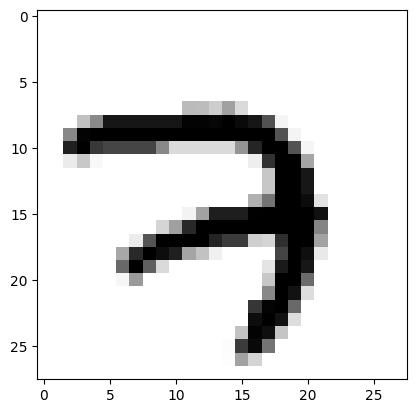

In [6]:
img1 = mnist.train.images[0].reshape(28,28)
plt.imshow(img1, cmap='Greys')

**Defining the number of neurons in each layer**

In [7]:
#number of neurons in input layer
num_input = 784  

#number of neurons in hidden layer 1
num_hidden1 = 512  

#number of neurons in hidden layer 2
num_hidden2 = 256  

#number of neurons in hidden layer 3
num_hidden_3 = 128  

#number of neurons in output layer
num_output = 10 

**Defining placeholders**

In [8]:
with tf.name_scope('input'):
    X = tf.placeholder("float", [None, num_input])

with tf.name_scope('output'):
    Y = tf.placeholder("float", [None, num_output])

**Since we have a 4 layer network, we have 4 weights and 4 baises. We initialize our weights by drawing values from the truncated normal distribution with a standard deviation of 0.1.**

In [9]:
with tf.name_scope('weights'):
    
        weights = {
        'w1': tf.Variable(tf.truncated_normal([num_input, num_hidden1], stddev=0.1),name='weight_1'),
        'w2': tf.Variable(tf.truncated_normal([num_hidden1, num_hidden2], stddev=0.1),name='weight_2'),
        'w3': tf.Variable(tf.truncated_normal([num_hidden2, num_hidden_3], stddev=0.1),name='weight_3'),
        'out': tf.Variable(tf.truncated_normal([num_hidden_3, num_output], stddev=0.1),name='weight_4'),
    }

In [10]:
with tf.name_scope('biases'):

    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]),name='bias_1'),
        'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]),name='bias_2'),
        'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden_3]),name='bias_3'),
        'out': tf.Variable(tf.constant(0.1, shape=[num_output]),name='bias_4')
    }

**Forward propagation**

In [11]:
with tf.name_scope('Model'):
    
    with tf.name_scope('layer1'):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']) )   
    
    with tf.name_scope('layer2'):
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))
        
    with tf.name_scope('layer3'):
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']))
        
    with tf.name_scope('output_layer'):
         y_hat = tf.nn.sigmoid(tf.matmul(layer_3, weights['out']) + biases['out'])

**Computing Loss and Backpropagate**

In [12]:
with tf.name_scope('Loss'):
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat,labels=Y))

In [13]:
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

**Computing Accuracy**

In [14]:
with tf.name_scope('Accuracy'):
    
    predicted_digit = tf.argmax(y_hat, 1)
    actual_digit = tf.argmax(Y, 1)
    
    correct_pred = tf.equal(predicted_digit,actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

**Creating Summary**

In [15]:
tf.summary.scalar("Accuracy", accuracy)

tf.summary.scalar("Loss", loss)

<tf.Tensor 'Loss_1:0' shape=() dtype=string>

In [16]:
merge_summary = tf.summary.merge_all()

**Training the model**

In [17]:
init = tf.global_variables_initializer()

In [18]:
batch_size = 128
num_iterations = 1000

In [19]:
with tf.Session() as sess:

    #run the initializer
    sess.run(init)

    #save the event files
    summary_writer = tf.summary.FileWriter('./graphs', graph=tf.get_default_graph())

    #train for some n number of iterations
    for i in range(num_iterations):
        
        #get batch of data according to batch size
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        #train the network
        sess.run(optimizer, feed_dict={
            X: batch_x, Y: batch_y
            })

        #print loss and accuracy on every 100th iteration
        if i % 100 == 0:
            
            #compute loss, accuracy and summary
            batch_loss, batch_accuracy,summary = sess.run(
                [loss, accuracy, merge_summary], feed_dict={X: batch_x, Y: batch_y}
                )

            #store all the summaries
            summary_writer.add_summary(summary, i)


            print('Iteration: {}, Loss: {}, Accuracy: {}'.format(i,batch_loss,batch_accuracy))

Iteration: 0, Loss: 2.2728686332702637, Accuracy: 0.1328125
Iteration: 100, Loss: 1.7491254806518555, Accuracy: 0.8046875
Iteration: 200, Loss: 1.6361286640167236, Accuracy: 0.8828125
Iteration: 300, Loss: 1.5938026905059814, Accuracy: 0.8984375
Iteration: 400, Loss: 1.5496151447296143, Accuracy: 0.9296875
Iteration: 500, Loss: 1.5685521364212036, Accuracy: 0.9140625
Iteration: 600, Loss: 1.549737811088562, Accuracy: 0.9140625
Iteration: 700, Loss: 1.5316247940063477, Accuracy: 0.953125
Iteration: 800, Loss: 1.5441861152648926, Accuracy: 0.9140625
Iteration: 900, Loss: 1.5117716789245605, Accuracy: 0.96875


**We observe that the loss decreases and the accuracy increases over the training iterations.**